In [2]:
# Dependencies
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import ipywidgets as widgets  # for use interface
from ipywidgets import interact, interact_manual

# Google developer API key
from config import api_key

In [3]:
dfs = pd.read_html("https://www.nbwa.org/resources/industry-fast-facts#:~:text=Based%20on%20beer%20shipment%20data,and%20considered%20legal%20drinking%20age.html")
df = dfs[0]

#for i in len(dfs):

top5_brewer = dfs[0]
top5_brewer = top5_brewer[:-1]  # remove the last (total column)
top5_brewer = top5_brewer.replace({'All Other Domestic and Imports': "Other"})

top5_brewer.rename(top5_brewer.iloc[1])

headers = top5_brewer.iloc[0]
new_df  = pd.DataFrame(top5_brewer.values[1:], columns=headers)
new_df
#top5_brewer.setindex(0)

,Brewer/Importer,2009 Share,2019 Share
0,Anheuser-Busch Inbev,48.8%,39.9%
1,"MillerCoors, LLC",29.5%,22.6%
2,Constellation,5.%,10.6%
3,Heineken USA,4.0%,3.3%
4,Boston Beer,0.9%,2.5%
5,Other,11.6%,21%


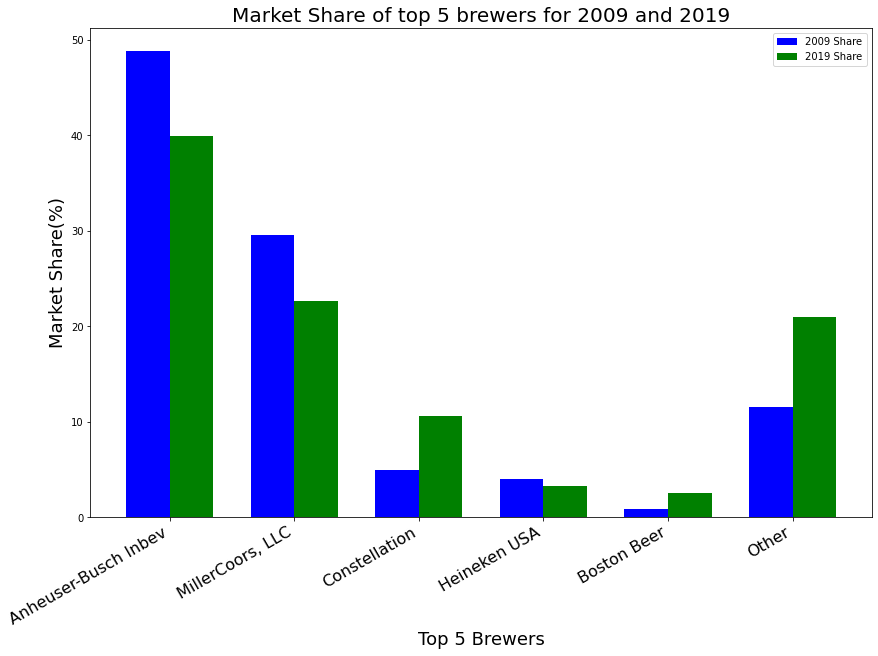

In [4]:
#  10 year maker sahre of top 5 brewers in the US for 2009 and 2019

ind = np.arange(len(new_df))
new_df["2009 Share"] = list(map(lambda x: x[:-1], new_df["2009 Share"].values))
new_df["2019 Share"] = list(map(lambda x: x[:-1], new_df["2019 Share"].values))

#  change the data type and sort the values
new_df['2009 Share'] = new_df['2009 Share'].astype(float)
new_df['2019 Share'] = new_df['2019 Share'].astype(float)
df = new_df.sort_values(by=['2009 Share'])

fig, ax = plt.subplots(figsize=(14, 10))
width = 0.35
ax.bar(ind, new_df["2009 Share"], width, color="blue", align='center', label='2009 Share')
ax.bar(ind + width, new_df["2019 Share"], width, color='g', align='center', label= "2019 Share")

ax.set_xlabel('Top 5 Brewers', fontsize=18)
ax.set_ylabel('Market Share(%)', fontsize=18)
ax.set_title('Market Share of top 5 brewers for 2009 and 2019', fontsize=20)
plt.xticks(ind + width / 2, (new_df["Brewer/Importer"]), fontsize=16)
plt.legend(loc='best')
fig.autofmt_xdate()
#ax.set_xticklabels(["ASB", "Violence", "Theft", "Public Order", "Drugs"])
#ax.xaxis_date()

plt.show()

In [5]:
gallup_poll = dfs[2]  # gallup poll result
headers = gallup_poll.iloc[0] # get the header
gallup_poll  = pd.DataFrame(gallup_poll.values[1:], columns=headers)

gallup_poll

,Year,Beer,Wine,Spirits
0,2001,46%,31%,18%
1,2002,44%,30%,22%
2,2003,42%,33%,22%
3,2004,39%,33%,24%
4,2005,39%,36%,21%
5,2006,41%,33%,23%
6,2007,40%,34%,22%
7,2008,42%,31%,23%
8,2009,40%,34%,21%
9,2010,41%,32%,21%


0   Year Beer Wine Spirits
0   2001  46%  31%     18%
1   2002  44%  30%     22%
2   2003  42%  33%     22%
3   2004  39%  33%     24%
4   2005  39%  36%     21%
5   2006  41%  33%     23%
6   2007  40%  34%     22%
7   2008  42%  31%     23%
8   2009  40%  34%     21%
9   2010  41%  32%     21%
10  2011  36%  35%     23%
11  2012  39%  35%     22%
12  2013  36%  35%     23%
13  2014  41%  31%     23%
14  2015  42%  34%     21%
15  2016  43%  32%     20%
16  2017  40%  30%     26%
17  2018  42%  34%     28%
18  2019  38%  30%     29%


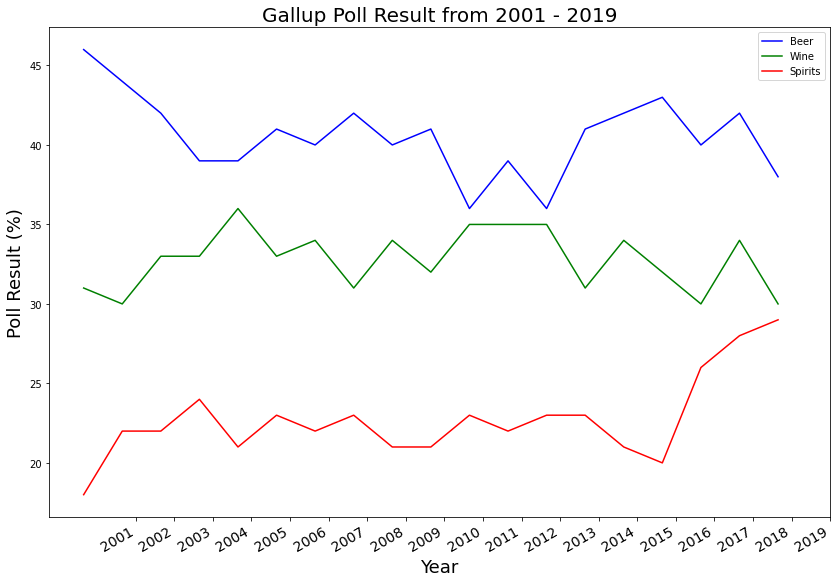

<bound method NDFrame.astype of 0   Year  Beer  Wine  Spirits
0   2001  46.0  31.0     18.0
1   2002  44.0  30.0     22.0
2   2003  42.0  33.0     22.0
3   2004  39.0  33.0     24.0
4   2005  39.0  36.0     21.0
5   2006  41.0  33.0     23.0
6   2007  40.0  34.0     22.0
7   2008  42.0  31.0     23.0
8   2009  40.0  34.0     21.0
9   2010  41.0  32.0     21.0
10  2011  36.0  35.0     23.0
11  2012  39.0  35.0     22.0
12  2013  36.0  35.0     23.0
13  2014  41.0  31.0     23.0
14  2015  42.0  34.0     21.0
15  2016  43.0  32.0     20.0
16  2017  40.0  30.0     26.0
17  2018  42.0  34.0     28.0
18  2019  38.0  30.0     29.0>

In [6]:
#  10 year maker sahre of top 5 brewers in the US for 2009 and 2019

ind = np.arange(len(gallup_poll))
print(gallup_poll)
poll = gallup_poll
poll['Beer'] = list(map(lambda x: x[:-1], gallup_poll['Beer'].values))
poll['Wine'] = list(map(lambda x: x[:-1], gallup_poll['Wine'].values))
poll['Spirits'] = list(map(lambda x: x[:-1], gallup_poll['Spirits'].values))
#  change the data type and sort the values
poll['Beer'] = poll['Beer'].astype(float)
poll['Wine'] = poll['Wine'].astype(float)
poll['Spirits'] = poll['Spirits'].astype(float)
#df = new_df.sort_values(by=['2009 Share'])

fig, ax = plt.subplots(figsize=(14, 10))
#width = 0.35
#ax.line(ind, poll['Beer'], width, color="blue", align='center', label='Beer')
#ax.line(ind + width, poll['Wine'], width, color='g', align='center', label= "Wine")
#ax.line(ind + width, poll['Spirits'], width, color='g', align='center', label= "Spirits")

# Plot the world average as a line chart
beer_line, = plt.plot(poll['Year'], poll['Beer'], color="blue", label='Beer')
wine_line, = plt.plot(poll['Year'], poll['Wine'], color="g", label="Wine" )
spirit_line, = plt.plot(poll['Year'], poll['Spirits'], color="r", label="Spirits" )

# Plot the unemployment values for a single country
#beer_line, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
 #                       color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[beer_line, wine_line, spirit_line], loc="best")

# Show the chart
#plt.show()

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Poll Result (%)', fontsize=18)
ax.set_title('Gallup Poll Result from 2001 - 2019', fontsize=20)
#plt.figure(figsize=(20,10))
plt.xticks(ind + width + 1 , (poll['Year']), fontsize=14)
plt.legend(loc='best')
fig.autofmt_xdate()
#ax.set_xticklabels(["ASB", "Violence", "Theft", "Public Order", "Drugs"])
#ax.xaxis_date()

plt.show()
gallup_poll.astype